<a href="https://colab.research.google.com/github/aripins/aripins/blob/main/FinalExam_Bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   int64  
 1   date                  1000 non-null   object 
 2   weight                1000 non-null   float64
 3   height                1000 non-null   float64
 4   blood_glucose         1000 non-null   float64
 5   physical_activity     1000 non-null   float64
 6   diet                  1000 non-null   int64  
 7   medication_adherence  1000 non-null   int64  
 8   stress_level          1000 non-null   int64  
 9   sleep_hours           1000 non-null   float64
 10  hydration_level       1000 non-null   int64  
 11  bmi                   1000 non-null   float64
 12  risk_score            1000 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 101.7+ KB
None

Check for Missing Values:
user_id            

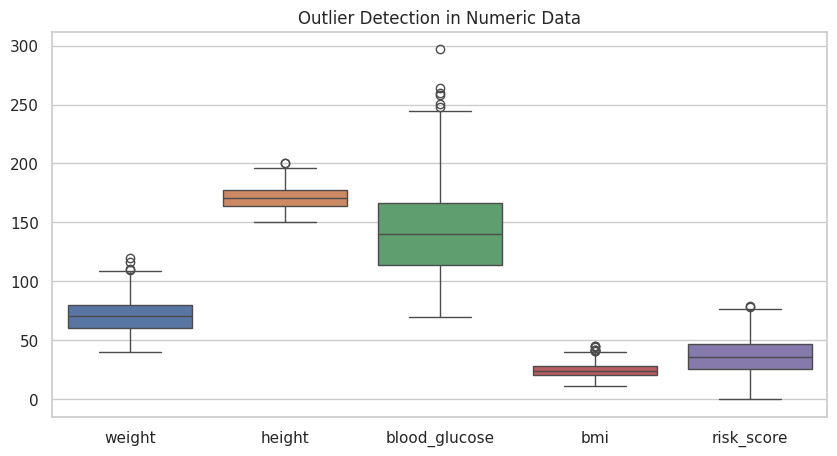

The cleaned data has been saved to: cleaned_diabetes_data.csv


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Dataset
file_path = "diabetes_data2.csv"
df = pd.read_csv(file_path)

# Displaying Initial Dataset Information
print("Dataset Info:")
print(df.info())
print("\nCheck for Missing Values:")
print(df.isnull().sum())

# Removing Duplicates
df.drop_duplicates(inplace=True)

# Handling Missing Values
# - Filling missing values for numeric columns with the mean
num_cols = ['weight', 'height', 'blood_glucose', 'bmi', 'risk_score']
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# - Filling missing values for categorical columns with the mode (most frequent value)
cat_cols = ['diet', 'medication_adherence', 'physical_activity']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#Changing Date Format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

#Normalizing Column Names (if necessary)
df.columns = df.columns.str.lower().str.replace(" ", "_")

#Detecting Outliers with Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[num_cols])
plt.title("Outlier Detection in Numeric Data")
plt.show()

# Saving the Cleaned Dataset
clean_file_path = "cleaned_diabetes_data.csv"
df.to_csv(clean_file_path, index=False)
print(f"The cleaned data has been saved to: {clean_file_path}")

Descriptive Statistics:
           user_id       weight       height  blood_glucose  \
count  1000.000000  1000.000000  1000.000000    1000.000000   
mean    500.500000    70.361797   170.795375     140.818899   
std     288.819436    14.467165     9.742934      38.064177   
min       1.000000    40.000000   150.000000      70.000000   
25%     250.750000    60.286145   163.937583     114.080015   
50%     500.500000    70.379509   170.630771     139.989969   
75%     750.250000    79.719158   177.288822     166.436613   
max    1000.000000   120.000000   200.000000     297.049508   

       physical_activity         diet  medication_adherence  stress_level  \
count        1000.000000  1000.000000            1000.00000   1000.000000   
mean           30.294497     0.604000               0.69300      0.950000   
std            19.305165     0.489309               0.46148      0.833183   
min             0.000000     0.000000               0.00000      0.000000   
25%            15.25159

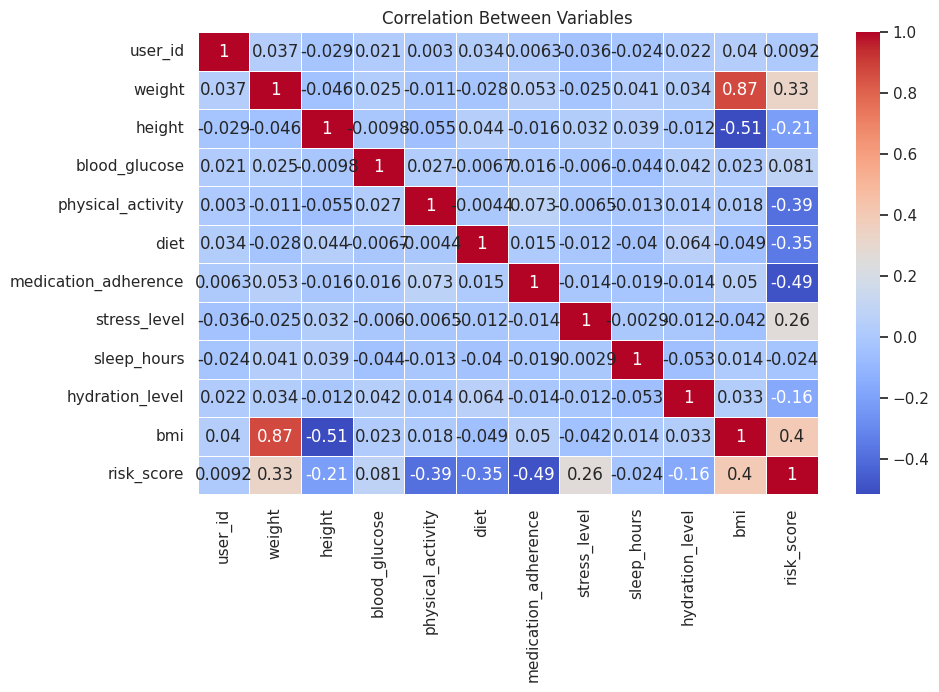

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Cleaned Data
df = pd.read_csv("cleaned_diabetes_data.csv")

# Displaying Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

# Removing Non-Numeric Columns Before Correlation
df_numeric = df.select_dtypes(include=['number'])  # Only selecting numeric columns

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Variables")
plt.show()

In [8]:
!pip install pygal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.6 MB/s eta 0:00:00


In [9]:
import pygal

hist = pygal.Histogram()
hist.title = "Distribusi BMI"
for val in df['bmi']:
    hist.add("BMI", [(1, val-1, val+1)])
hist.render_in_browser()

file:///tmp/tmpoef0mwlr.html


In [10]:
scatter = pygal.XY(stroke=False)
scatter.title = "Blood Glucose vs Risk Score"
scatter.add("Data Points", [(df['blood_glucose'][i], df['risk_score'][i]) for i in range(len(df))])
scatter.render_in_browser()

file:///tmp/tmp07qfe8qj.html


In [11]:
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 30.6 MB/s eta 0:00:00


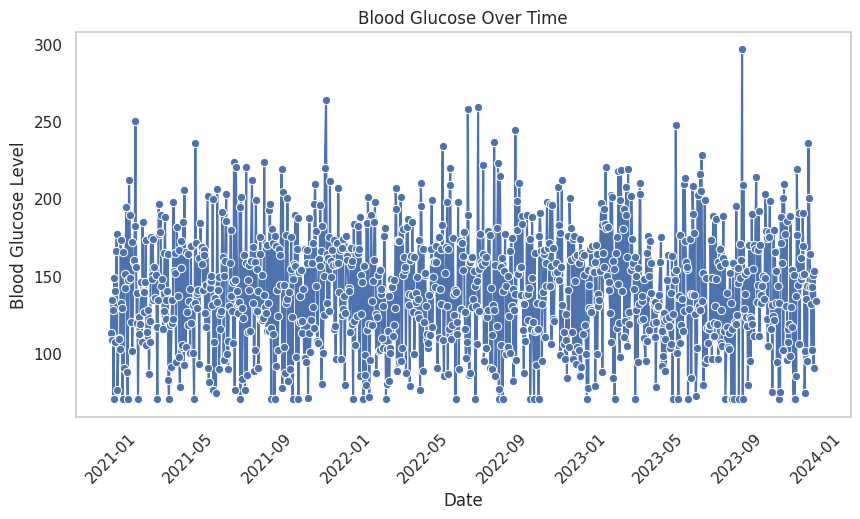

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'date' column to datetime format if it isn't already
df['date'] = pd.to_datetime(df['date'])

# Create a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['date'], y=df['blood_glucose'], marker='o', linestyle='-')

# Add title and labels
plt.title("Blood Glucose Over Time")
plt.xlabel("Date")
plt.ylabel("Blood Glucose Level")
plt.xticks(rotation=45)
plt.grid()

# Display the plot
plt.show()

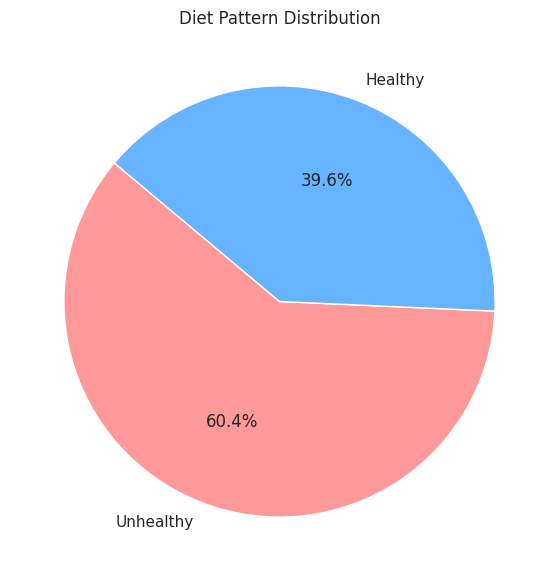

In [39]:
import matplotlib.pyplot as plt

# Count the number of each category
diet_counts = df['diet'].value_counts()
labels = ['Unhealthy', 'Healthy']
colors = ['#ff9999', '#66b3ff']

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(diet_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)

# Add title
plt.title("Diet Pattern Distribution")

# Display the plot
plt.show()

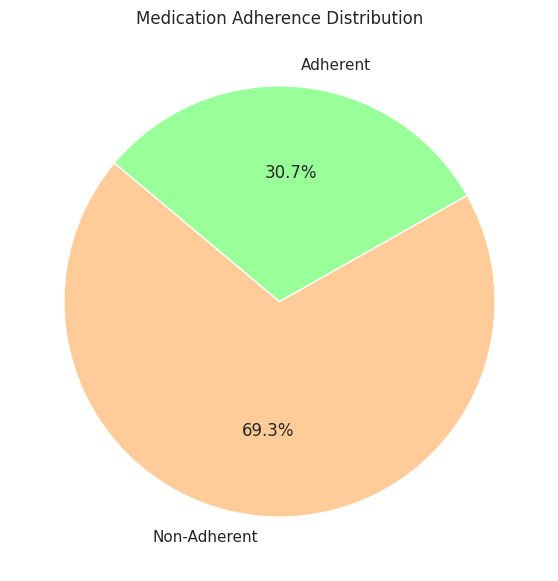

In [40]:
import matplotlib.pyplot as plt

# Count the number of each category
medication_counts = df['medication_adherence'].value_counts()
labels = ['Non-Adherent', 'Adherent']
colors = ['#ffcc99', '#99ff99']

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(medication_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)

# Add title
plt.title("Medication Adherence Distribution")

# Display the plot
plt.show()

Descriptive Statistics:
           user_id       weight       height  blood_glucose  \
count  1000.000000  1000.000000  1000.000000    1000.000000   
mean    500.500000    70.361797   170.795375     140.818899   
std     288.819436    14.467165     9.742934      38.064177   
min       1.000000    40.000000   150.000000      70.000000   
25%     250.750000    60.286145   163.937583     114.080015   
50%     500.500000    70.379509   170.630771     139.989969   
75%     750.250000    79.719158   177.288822     166.436613   
max    1000.000000   120.000000   200.000000     297.049508   

       physical_activity         diet  medication_adherence  stress_level  \
count        1000.000000  1000.000000            1000.00000   1000.000000   
mean           30.294497     0.604000               0.69300      0.950000   
std            19.305165     0.489309               0.46148      0.833183   
min             0.000000     0.000000               0.00000      0.000000   
25%            15.25159

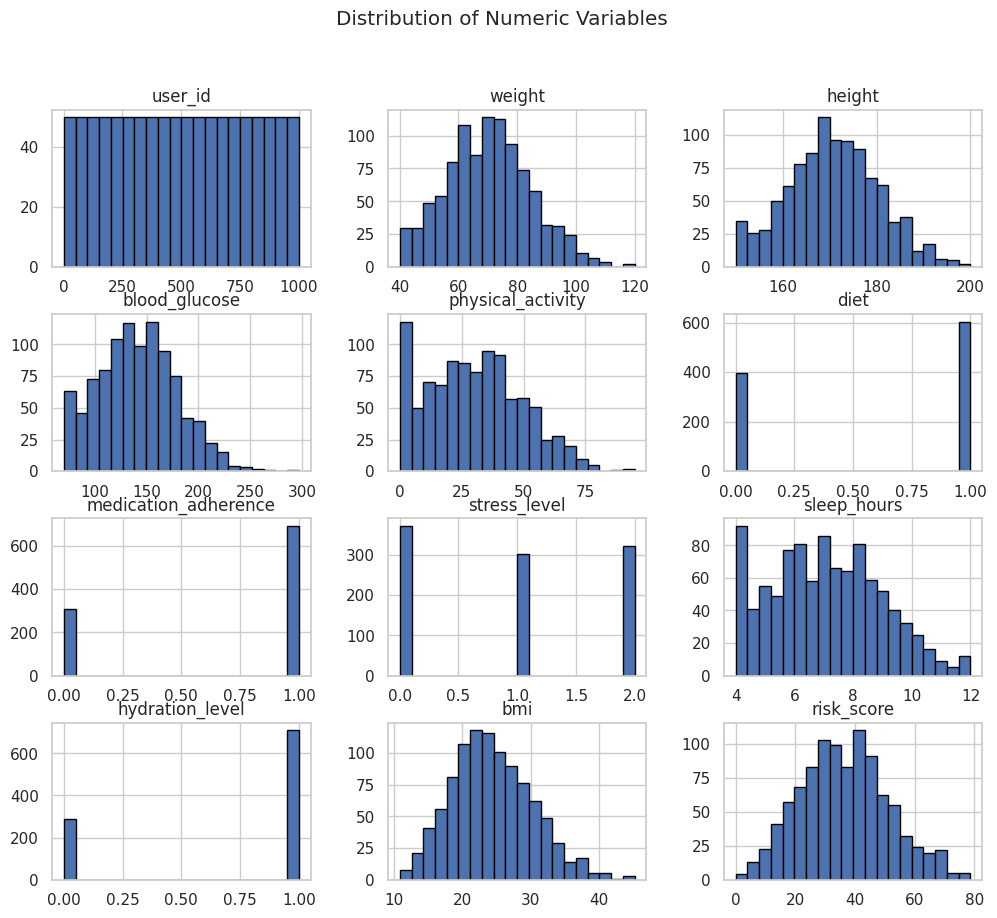

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the cleaned dataset
df = pd.read_csv("cleaned_diabetes_data.csv")

# Displaying descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# Plotting histograms for numeric variables
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numeric Variables")
plt.show()

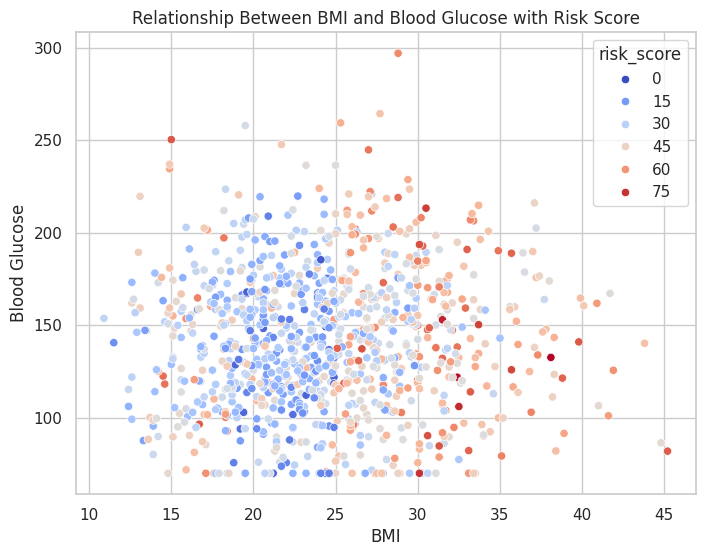

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot to Observe the Relationship Between Important Variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['bmi'], y=df['blood_glucose'], hue=df['risk_score'], palette="coolwarm")
plt.title("Relationship Between BMI and Blood Glucose with Risk Score")
plt.xlabel("BMI")
plt.ylabel("Blood Glucose")
plt.show()

In [17]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [43]:
import streamlit as st
import pandas as pd
import pygal
from pygal.style import DarkStyle

# Load Data
df = pd.read_csv("cleaned_diabetes_data.csv")

# Streamlit App
st.title("Diabetes Data Dashboard")

# Line Chart with Pygal
line_chart = pygal.Line(style=DarkStyle)
line_chart.title = "Blood Glucose Over Time"
line_chart.x_labels = df['date'].astype(str).tolist()  # Convert dates to string for labeling
line_chart.add("Blood Glucose", df['blood_glucose'].tolist())  # Adding blood glucose data

# Render the line chart in the Streamlit app
st.write(line_chart.render_data_uri(), unsafe_allow_html=True)

2025-01-27 12:43:05.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-27 12:43:05.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-27 12:43:05.651 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-27 12:43:05.654 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-27 12:43:05.684 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-27 12:43:05.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


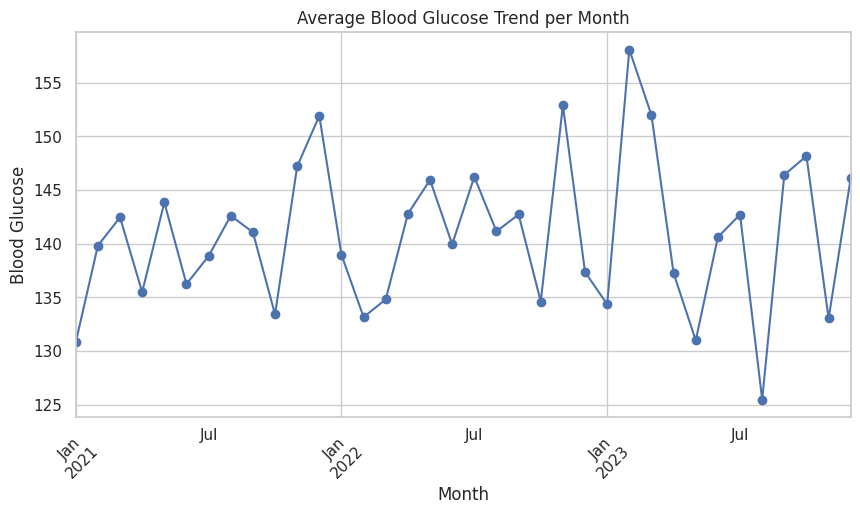

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Cleaned Data
df = pd.read_csv("cleaned_diabetes_data.csv")

# Convert 'date' to datetime format for trend analysis
df['date'] = pd.to_datetime(df['date'])

### 1. Time Trend: Average Blood Glucose Per Month ###
df['month'] = df['date'].dt.to_period('M')  # Extract month and year
monthly_avg = df.groupby('month')['blood_glucose'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(marker='o', linestyle='-')
plt.title("Average Blood Glucose Trend per Month")
plt.xlabel("Month")
plt.ylabel("Blood Glucose")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

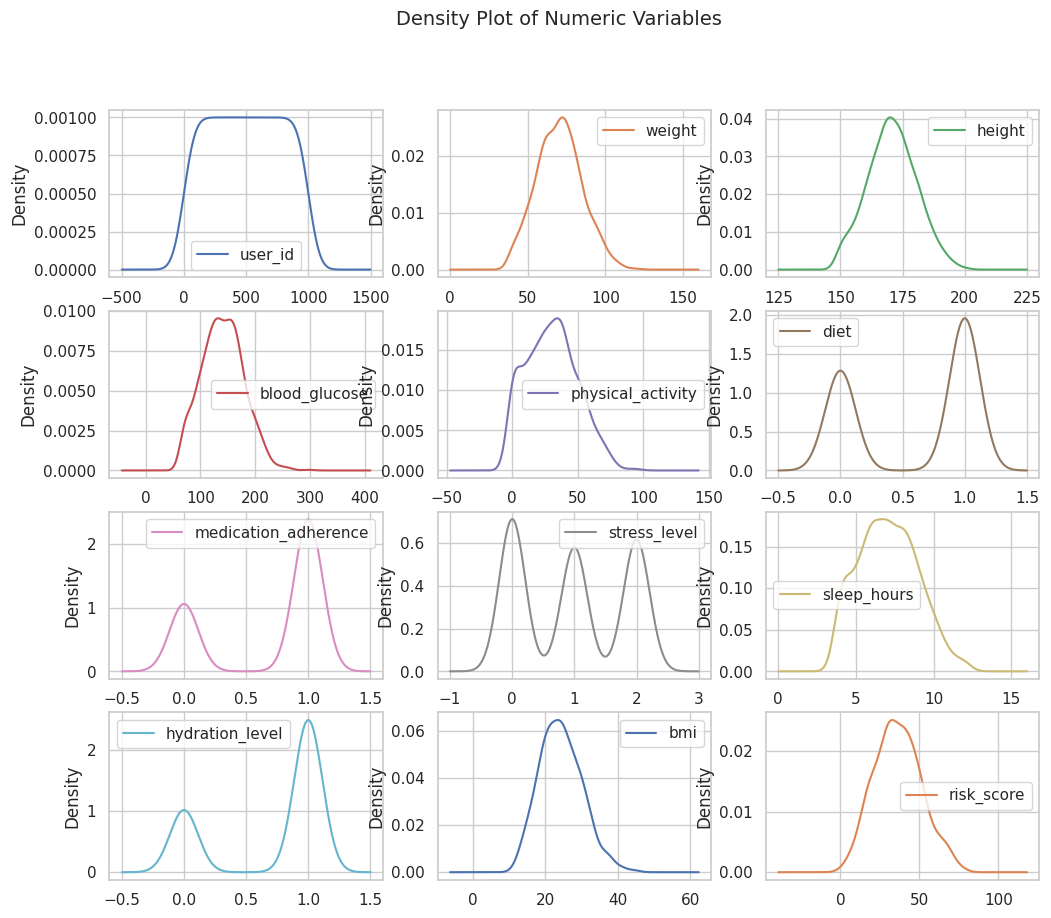

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecting only numeric variables from the DataFrame
df_numeric = df.select_dtypes(include=['number'])

# Creating density plots
df_numeric.plot(kind='density', subplots=True, layout=(4, 3), figsize=(12, 10), sharex=False)
plt.suptitle("Density Plot of Numeric Variables", fontsize=14)
plt.show()

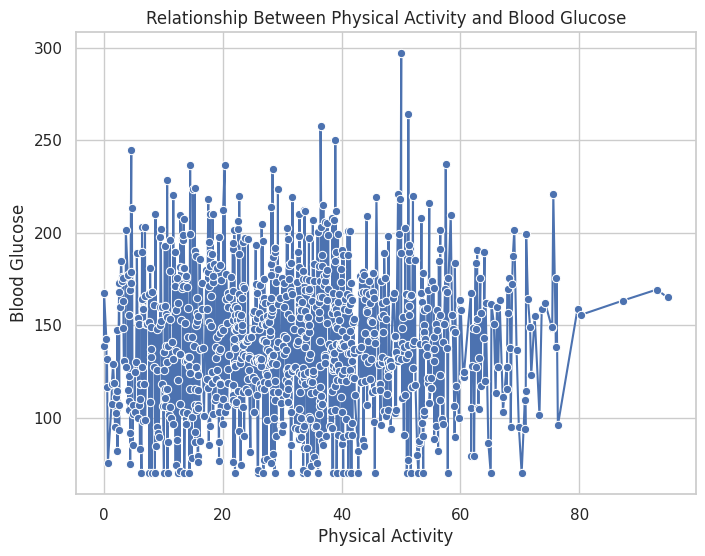

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot for the trend of Physical Activity vs Blood Glucose
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['physical_activity'], y=df['blood_glucose'], marker='o', linestyle='-')

# Add title and labels
plt.title("Relationship Between Physical Activity and Blood Glucose")
plt.xlabel("Physical Activity")
plt.ylabel("Blood Glucose")
plt.grid(True)

# Display the plot
plt.show()

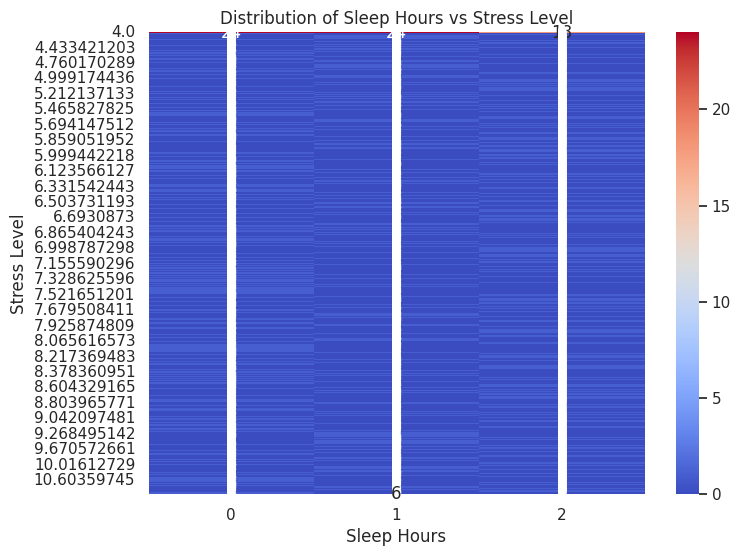

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a heatmap for the distribution of sleep hours and stress level
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['sleep_hours'], df['stress_level']), annot=True, cmap="coolwarm")
plt.title("Distribution of Sleep Hours vs Stress Level")
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.show()

In [22]:
!streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.199.227.69:8501

  Stopping...
  Stopping...
